In [13]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

Используется Python 3.5

# Центральная предельная теорема своими руками

## Непрерывная случайная величина

Я использую случайную величину, которая описывается экспоненциальным распределением

In [7]:
#Сгенерируем случайную величину
rv = sts.expon()

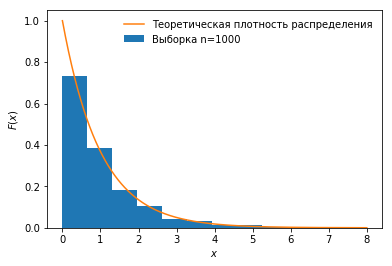

In [26]:
#Теперь сделаем выборку объемом n=1000, построим ее гистограмму и теоретическую плотность распределения
sample = rv.rvs(1000)

x = np.linspace(0,8, 1000)
pdf = rv.pdf(x)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

plt.hist(sample, normed=True, label='Выборка n=1000')
plt.plot(x, pdf, label='Теоретическая плотность распределения')
plt.legend(loc='best', frameon=False)

## Апроксимация выборочного среднего

Теперь сгенериуем 1000 выборок трех разных объемов (n = 5, 10, 50), построим гистограммы выборочных средних каждой выборки и посмотрим, насколько точно можно апроксимировать эту величину в зависимости от объема выборки. По ЦПТ выборочное среднее описывается нормальным распределнием


In [59]:
#функция подсчета выборочного среднего
def calculate_mean(set):
    summa = 0
    for count, i in enumerate(set):
        summa += i
    return summa/count

In [60]:
#записывать выборочные средние будем в список
rv_mean = []

n = 5

#сделаем 1000 выборок размера 5, подсчитаем выборочное среднее и добавим его в список средних
for k in range(1000):
    sample = rv.rvs(n)
    rv_mean.append(calculate_mean(sample))

(array([  50.,  218.,  283.,  214.,  123.,   69.,   21.,   11.,    6.,    5.]),
 array([ 0.1420691 ,  0.4914741 ,  0.84087909,  1.19028408,  1.53968908,
         1.88909407,  2.23849906,  2.58790406,  2.93730905,  3.28671404,
         3.63611904]),
 <a list of 10 Patch objects>)

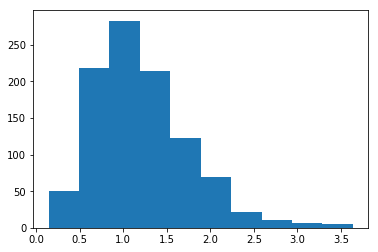

In [61]:
plt.hist(rv_mean)